# Breast Cancer Classification

### Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [10]:
breast_cancer_data = sklearn.datasets.load_breast_cancer()

In [11]:
breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [14]:
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

In [15]:
df['Label'] = breast_cancer_data.target

In [16]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [17]:
df.shape

(569, 31)

In [18]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
df['Label'].value_counts()

1    357
0    212
Name: Label, dtype: int64

0 => Malignant

1 => Benign

### Visualization

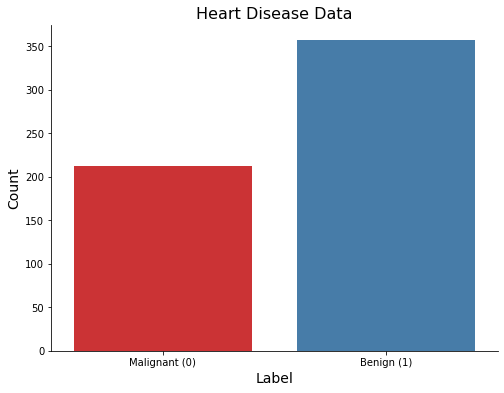

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Label'], palette="Set1")
plt.title("Heart Disease Data", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["Malignant (0)", "Benign (1)"])  # Customizing x-axis labels
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [22]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Label                      0
dtype: int64

### Separating features and target

In [23]:
X = df.drop(columns='Label', axis=1)
Y = df['Label']

### Standardizing the features

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting Training and Testing Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y)

In [26]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


## Model Evaluation

### Logistic Regression

In [27]:
lr_model = LogisticRegression(max_iter=10, random_state=1)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10, random_state=1)

In [28]:
y_pred_test = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9912280701754386


In [29]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



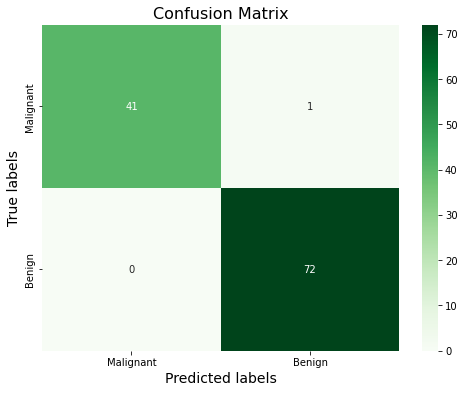

In [30]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['Malignant', 'Benign']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### SVM

In [31]:
svm_model = SVC(C=2.0, kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)

SVC(C=2.0, kernel='linear', random_state=1)

In [32]:
y_pred_test = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9824561403508771


In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



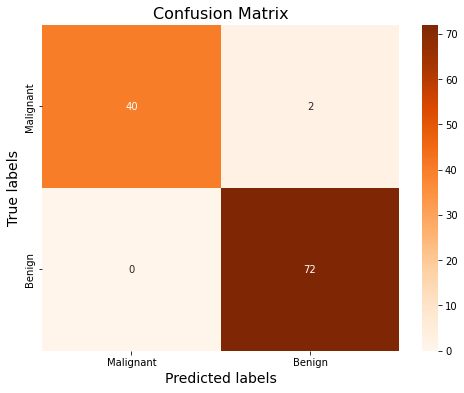

In [34]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['Malignant', 'Benign']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### Random Forest

In [35]:
rf_model = RandomForestClassifier(n_estimators=15, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=1)

In [36]:
y_pred_test = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9473684210526315


In [37]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



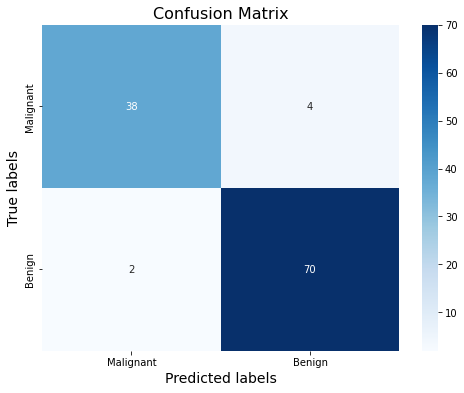

In [38]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['Malignant', 'Benign']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### Saving the Model

In [39]:
pickle.dump(rf_model, open('Breast_Cancer_Model.sav', 'wb'))

## Predictive System

In [41]:
# Taking user inputs
mean_radius  = float(input("Enter Mean Radius: "))
mean_texture  = float(input("Enter Mean Texture: "))
mean_perimeter  = float(input("Enter Mean Perimeter: "))
mean_area  = float(input("Enter Mean Area: "))
mean_smoothness  = float(input("Enter Mean Smoothness: "))
mean_compactness  = float(input("Enter Mean Compactness: "))
mean_concavity  = float(input("Enter Mean Concavity: "))
mean_concave_points  = float(input("Enter Mean Concave Points: "))
mean_symmetry  = float(input("Enter Mean Symmetry: "))
mean_fractal_dimension  = float(input("Enter Mean Fractal Dimension: "))
radius_error  = float(input("Enter Radius Error: "))
texture_error  = float(input("Enter Texture Error: "))
perimeter_error  = float(input("Enter Perimeter Error: "))
area_error  = float(input("Enter Area Error: "))
smoothness_error  = float(input("Enter Smoothness Error: "))
compactness_error  = float(input("Enter Compactness Error: "))
concavity_error  = float(input("Enter Concavity Error: "))
concave_points_error  = float(input("Enter Concave Points Error: "))
symmetry_error  = float(input("Enter Symmetry Error: "))
fractal_dimension_error  = float(input("Enter Fractal Dimension Error: "))
worst_radius  = float(input("Enter Worst Radius: "))
worst_texture  = float(input("Enter Worst Texture: "))
worst_perimeter  = float(input("Enter Worst Perimeter: "))
worst_area  = float(input("Enter Worst Area: "))
worst_smoothness  = float(input("Enter Worst Smoothness: "))
worst_compactness  = float(input("Enter Worst Compactness: "))
worst_concavity  = float(input("Enter Worst Concavity: "))
worst_concave_points  = float(input("Enter Worst Concave Points: "))
worst_symmetry  = float(input("Enter Worst Symmetry: "))
worst_fractal_dimension  = float(input("Enter Worst Fractal Dimension: "))


# Converting the list in a DataFrame
features_df = pd.DataFrame({
    "mean_radius": [mean_radius],
    "mean_texture": [mean_texture],
    "mean_perimeter": [mean_perimeter],
    "mean_area": [mean_area],
    "mean_smoothness": [mean_smoothness],
    "mean_compactness": [mean_compactness],
    "mean_concavity": [mean_concavity],
    "mean_concave_points": [mean_concave_points],
    "mean_symmetry": [mean_symmetry],
    "mean_fractal_dimension": [mean_fractal_dimension],
    "radius_error": [radius_error],
    "texture_error": [texture_error],
    "perimeter_error": [perimeter_error],
    "area_error": [area_error],
    "smoothness_error": [smoothness_error],
    "compactness_error": [compactness_error],
    "concavity_error": [concavity_error],
    "concave_points_error": [concave_points_error],
    "symmetry_error": [symmetry_error],
    "fractal_dimension_error": [fractal_dimension_error],
    "worst_radius": [worst_radius],
    "worst_texture": [worst_texture],
    "worst_perimeter": [worst_perimeter],
    "worst_area": [worst_area],
    "worst_smoothness": [worst_smoothness],
    "worst_compactness": [worst_compactness],
    "worst_concavity": [worst_concavity],
    "worst_concave_points": [worst_concave_points],
    "worst_symmetry": [worst_symmetry],
    "worst_fractal_dimension": [worst_fractal_dimension]
})

# Predicting heart disease based on the features
prediction = rf_model.predict(features_df)

# Display the prediction"
if prediction[0] == 0:
    print("\n\033[1mYou have Malignant Breast Cancer")
else:
    print("\n\033[1mYou have Benign Breast Cancer")

Enter Mean Radius: 17.99
Enter Mean Texture: 10.38
Enter Mean Perimeter: 122.8
Enter Mean Area: 1001
Enter Mean Smoothness: 0.1184
Enter Mean Compactness: 0.2776
Enter Mean Concavity: 0.3001
Enter Mean Concave Points: 0.1471
Enter Mean Symmetry: 0.2419
Enter Mean Fractal Dimension: 0.07871
Enter Radius Error: 1.095
Enter Texture Error: 0.9053
Enter Perimeter Error: 8.589
Enter Area Error: 153.4
Enter Smoothness Error: 0.006399
Enter Compactness Error: 0.04904
Enter Concavity Error: 0.05373
Enter Concave Points Error: 0.01587
Enter Symmetry Error: 0.03003
Enter Fractal Dimension Error: 0.006193
Enter Worst Radius: 25.38
Enter Worst Texture: 17.33
Enter Worst Perimeter: 184.6
Enter Worst Area: 2019
Enter Worst Smoothness: 0.1622
Enter Worst Compactness: 0.6656
Enter Worst Concavity: 0.7119
Enter Worst Concave Points: 0.2654
Enter Worst Symmetry: 0.4601
Enter Worst Fractal Dimension: 0.1189

You have Malignant Breast Cancer
